                                EcoType: Forest Cover Type Prediction Using Machine Learning

IMPORTED LIBRAIES 

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Preprocessing
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Imbalance Handling
from imblearn.over_sampling import SMOTE


DATA LOADING

In [2]:
Data= pd.read_csv(r"F:\project3\cover_type (1).csv")

In [3]:
data=pd.DataFrame(Data)


In [4]:
print(data)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
145885       2834      88      8                               376   
145886       2832      68      4                               390   
145887       2829      80      7                               390   
145888       2826     121      7                               379   
145889       2823     132     12                               371   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1        

DATA UNDERSTANDING

In [5]:
##DATASET SHAPE,INFO,DESCRIBE
print(data.shape)

(145890, 55)


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Wilderness_Area_1                   145890 non-null  int64 
 11  Wilderness_Area_2                   145

In [7]:
### NUMERIC SUMMARY
print(data.describe())

           Elevation         Aspect          Slope  \
count  145890.000000  145890.000000  145890.000000   
mean     2874.458949     141.127418      11.925574   
std       210.801279     107.719296       6.319326   
min      1863.000000       0.000000       0.000000   
25%      2747.000000      54.000000       7.000000   
50%      2909.000000     108.000000      11.000000   
75%      3004.000000     217.000000      15.000000   
max      3849.000000     360.000000      61.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     145890.000000                   145890.000000   
mean                         251.824738                       34.554322   
std                          192.473899                       41.215776   
min                            0.000000                     -146.000000   
25%                           95.000000                        7.000000   
50%                          212.000000                       2

In [8]:
### TARGET CLASS DISTRIBUTION
print(data['Cover_Type'].value_counts())


Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64


In [9]:
### CHECK MISSING VALUE
print(data.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


DATA CLEANING & TRANSFORMATION

In [10]:
### CHECK DUPLICATE VALUE
data.duplicated().sum()
numerical_cols =data.select_dtypes(include=['int64']).columns
print(numerical_cols)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

OUTLIERS

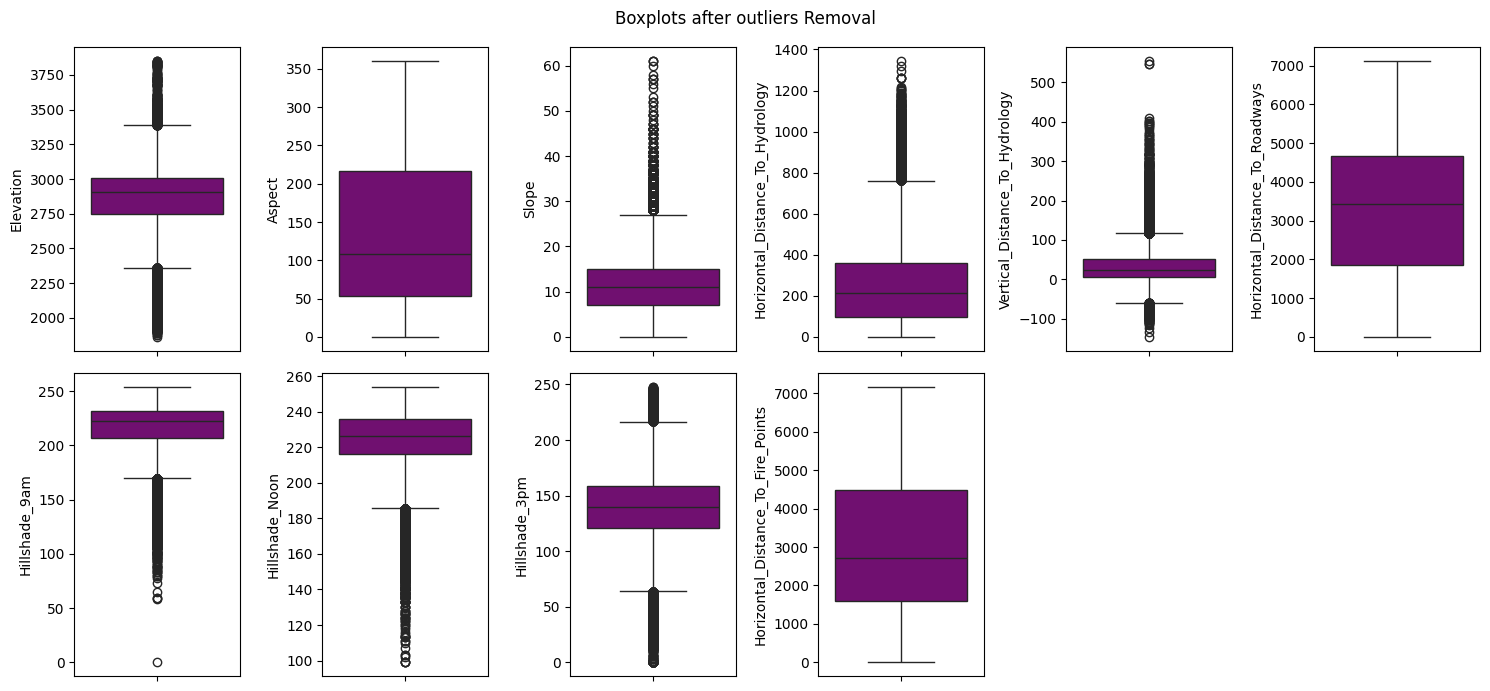

In [11]:
numerical_cols = ['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='purple')
    plt.tight_layout()


IQR METHOD USING

In [12]:
for col in numerical_cols:

    Q1 = data[col].quantile(0.25)  # 25%th percentile
    Q3 = data[col].quantile(0.75)  # 75%th percentile
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

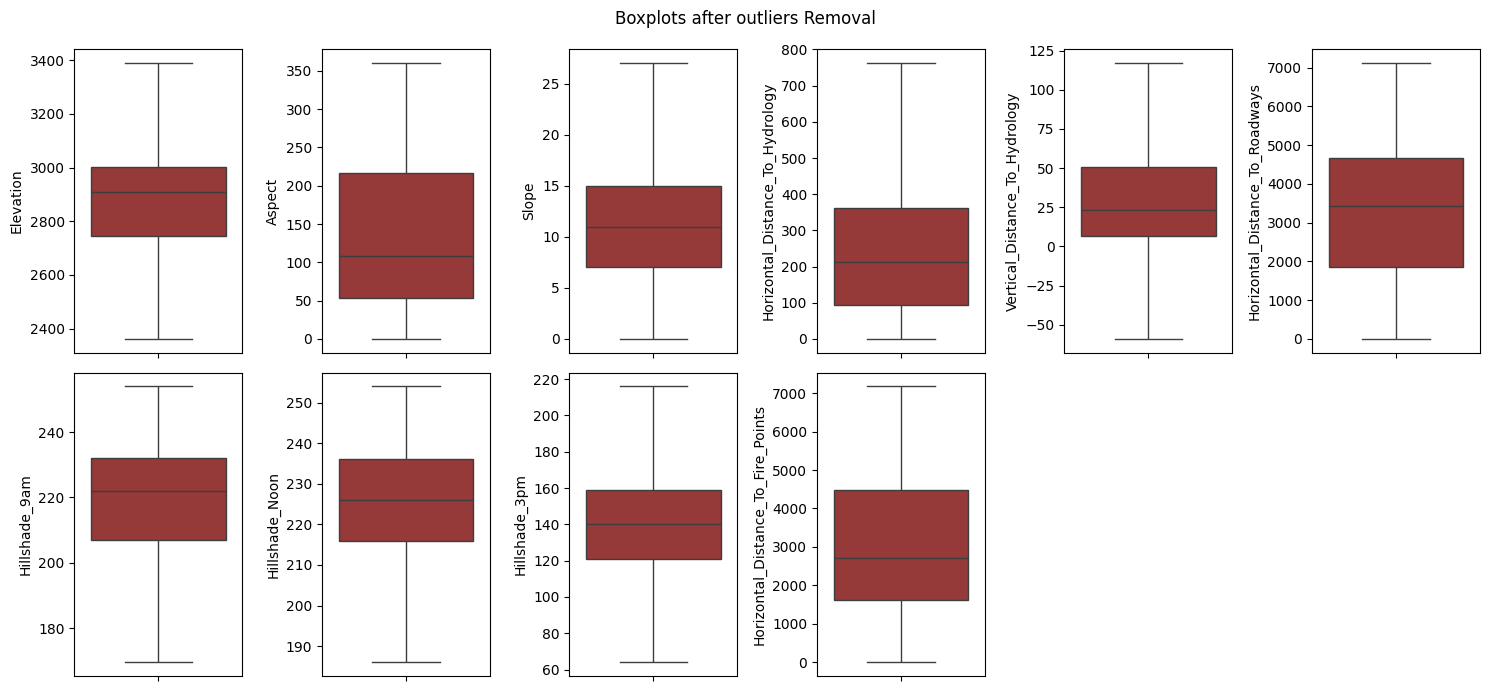

In [13]:
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='brown')
    plt.tight_layout()

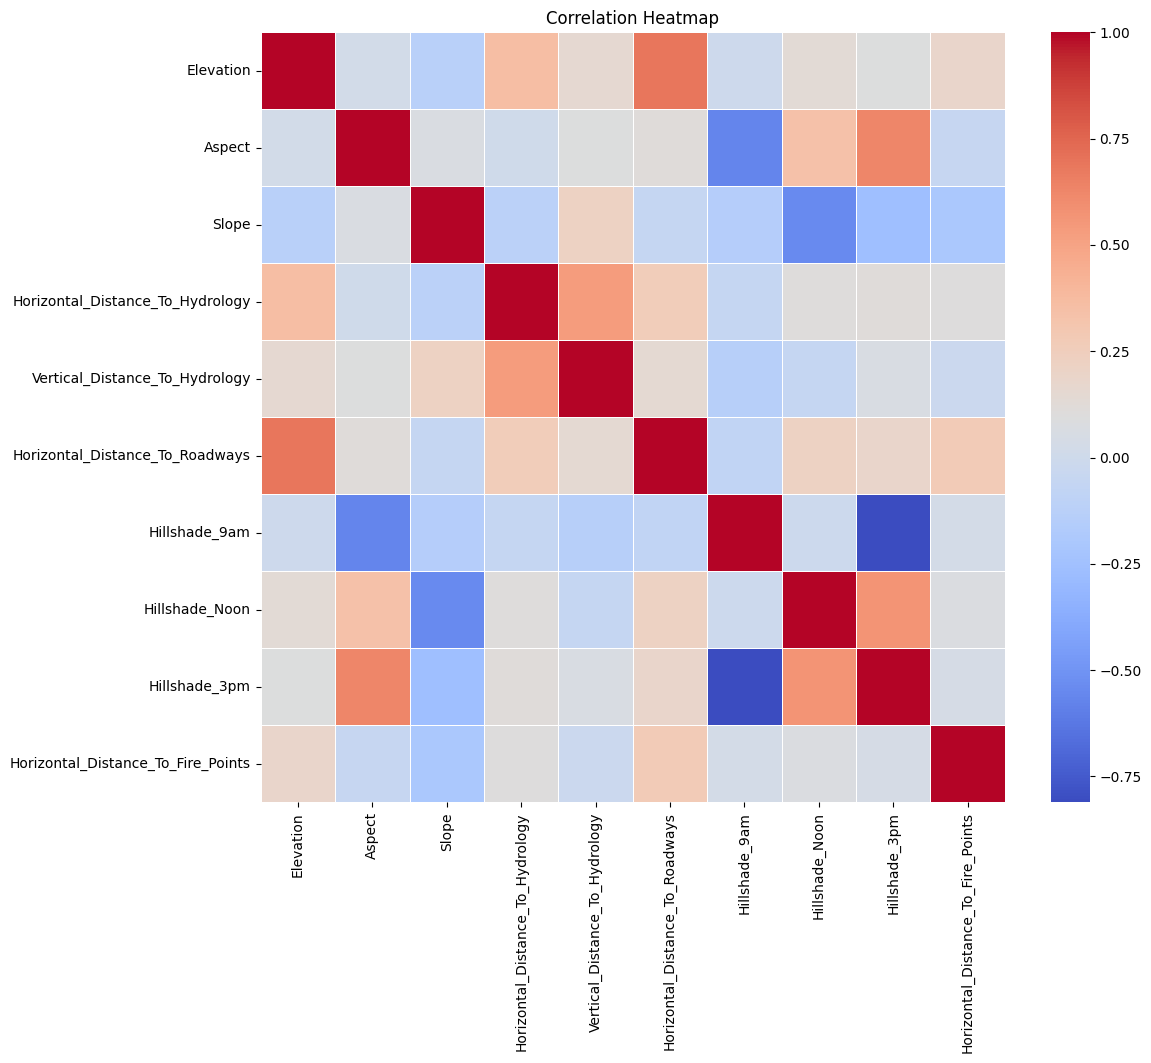

In [14]:
# --- Bivariate Analysis ---
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data[numerical_cols].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


SKEWNESS

In [16]:
skewness = data[numerical_cols].skew()
print(skewness)

Elevation                            -0.340370
Aspect                                0.689432
Slope                                 0.621361
Horizontal_Distance_To_Hydrology      0.792349
Vertical_Distance_To_Hydrology        0.861265
Horizontal_Distance_To_Roadways      -0.058240
Hillshade_9am                        -0.740409
Hillshade_Noon                       -0.505363
Hillshade_3pm                        -0.001189
Horizontal_Distance_To_Fire_Points    0.365249
dtype: float64


FEATURE ENGINEERING

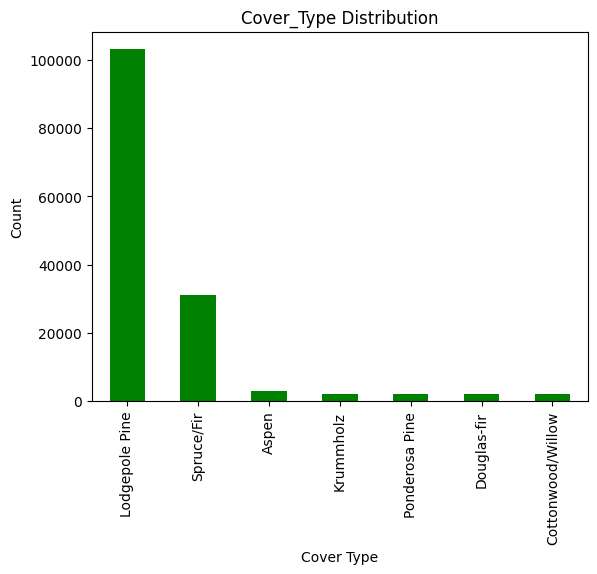

In [17]:
### COUNT BAR PLOT FOR BEFORE ENCODING
data['Cover_Type'].value_counts().plot(kind='bar', color='green', title='Cover_Type Distribution')
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


In [18]:
data['Slope_Hydrology_Ratio'] =data['Slope'] / (data['Horizontal_Distance_To_Hydrology'] + 1)  # add 1 to avoid division by zero
data['Distance_To_Hydrology']= np.sqrt(data['Horizontal_Distance_To_Hydrology']**2+ data['Vertical_Distance_To_Hydrology']**2)
data['Water_Elevation']= data['Elevation']-data['Vertical_Distance_To_Hydrology']
data["Hillshade_Avg"]= (data["Hillshade_9am"] + data["Hillshade_Noon"] + data["Hillshade_3pm"]) / 3


In [19]:
print(data.shape)

(145890, 59)


In [20]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Slope_Hydrology_Ratio,Distance_To_Hydrology,Water_Elevation,Hillshade_Avg
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0,0,0,0,0,Aspen,0.011583,258.000000,2596.0,200.333333
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0,0,0,0,0,Aspen,0.009390,212.084889,2596.0,202.000000
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0,0,0,0,0,Lodgepole Pine,0.033457,275.769832,2739.0,202.333333
3,2785.0,155.0,18.0,242.0,117.0,3090.0,238.0,238.0,122.0,6211.0,...,0,0,0,0,0,Lodgepole Pine,0.074074,268.799182,2668.0,199.333333
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0,0,0,0,0,Aspen,0.012987,153.003268,2596.0,201.333333


MERGING AND DROPING COLUMNS IN THE DATASET

In [21]:
data['Wilderness']=data[[w for w in data.columns if "Wilderness" in w]].idxmax(axis=1)
data['Soil_Type']=data[[s for s in data.columns if "Soil_Type" in s]].idxmax(axis=1)
data=data.drop(columns=[w for w in data.columns if "Wilderness_" in w])
data=data.drop(columns=[s for s in data.columns if "Soil_Type_" in s])

In [22]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Slope_Hydrology_Ratio,Distance_To_Hydrology,Water_Elevation,Hillshade_Avg,Wilderness,Soil_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,Aspen,0.011583,258.000000,2596.0,200.333333,Wilderness_Area_1,Soil_Type_29
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,Aspen,0.009390,212.084889,2596.0,202.000000,Wilderness_Area_1,Soil_Type_29
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,Lodgepole Pine,0.033457,275.769832,2739.0,202.333333,Wilderness_Area_1,Soil_Type_12
3,2785.0,155.0,18.0,242.0,117.0,3090.0,238.0,238.0,122.0,6211.0,Lodgepole Pine,0.074074,268.799182,2668.0,199.333333,Wilderness_Area_1,Soil_Type_30
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,Aspen,0.012987,153.003268,2596.0,201.333333,Wilderness_Area_1,Soil_Type_29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145885,2834.0,88.0,8.0,376.0,44.0,2552.0,232.0,227.0,128.0,1595.0,Lodgepole Pine,0.021220,378.565714,2790.0,195.666667,Wilderness_Area_1,Soil_Type_29
145886,2832.0,68.0,4.0,390.0,44.0,2522.0,224.0,231.0,142.0,1572.0,Lodgepole Pine,0.010230,392.474203,2788.0,199.000000,Wilderness_Area_1,Soil_Type_29
145887,2829.0,80.0,7.0,390.0,33.0,2492.0,229.0,228.0,133.0,1550.0,Lodgepole Pine,0.017903,391.393664,2796.0,196.666667,Wilderness_Area_1,Soil_Type_29
145888,2826.0,121.0,7.0,379.0,30.0,2462.0,232.0,234.0,135.0,1528.0,Lodgepole Pine,0.018421,380.185481,2796.0,200.333333,Wilderness_Area_1,Soil_Type_29


LABEL ENCODING

In [23]:
# Target Encoding
target_encoder=LabelEncoder()
data['Cover_Type']=target_encoder.fit_transform(data['Cover_Type'])
with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

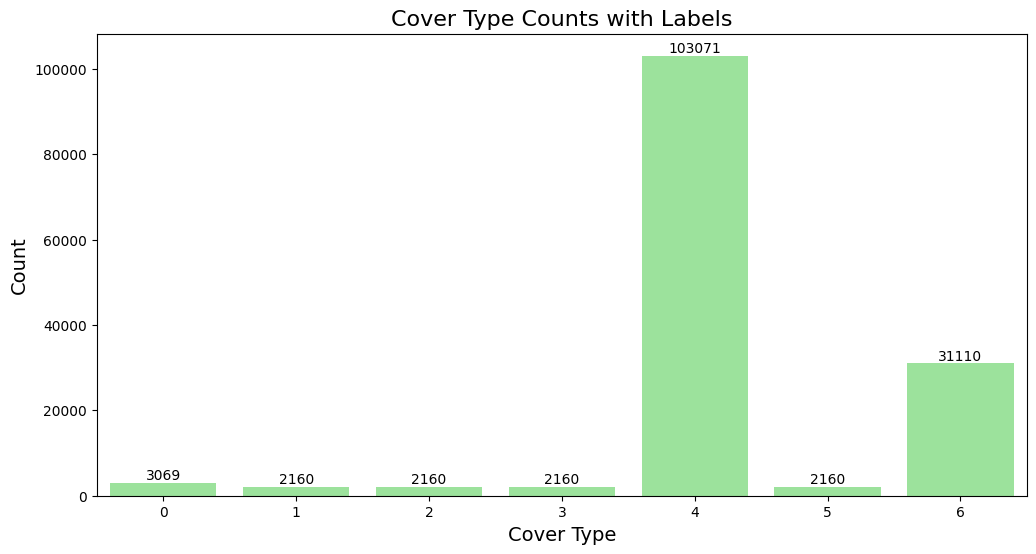

In [24]:
### COUNT PLOT FOR AFTER ENCODING
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Cover_Type', data=data, color='lightgreen')
ax.bar_label(ax.containers[0])
plt.title("Cover Type Counts with Labels", fontsize=16)
plt.xlabel("Cover Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [25]:
wilderness_encoder=LabelEncoder()
soil_encoder=LabelEncoder()

data['Wilderness']=wilderness_encoder.fit_transform(data['Wilderness'])
with open('wilderness_encoder.pkl', 'wb') as f:
    pickle.dump(wilderness_encoder, f)

data['Soil_Type']=soil_encoder.fit_transform(data['Soil_Type'])
with open('soil_encoder.pkl', 'wb') as f:
    pickle.dump(soil_encoder, f)

DATA SPLITING

In [26]:
X= data.drop(columns=['Cover_Type','Hillshade_9am','Hillshade_Noon','Hillshade_3pm'])
Y= data['Cover_Type']

In [27]:
print(X.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           117.0                           3090.0   
4                            -1.0                            391.0   

   Horizontal_Distance_To_Fire_Points  Slope_Hydrology_Ratio  \
0                              6279.0               0.011583   
1                              6225.0               0.009390

In [28]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  float64
 1   Aspect                              145890 non-null  float64
 2   Slope                               145890 non-null  float64
 3   Horizontal_Distance_To_Hydrology    145890 non-null  float64
 4   Vertical_Distance_To_Hydrology      145890 non-null  float64
 5   Horizontal_Distance_To_Roadways     145890 non-null  float64
 6   Horizontal_Distance_To_Fire_Points  145890 non-null  float64
 7   Slope_Hydrology_Ratio               145890 non-null  float64
 8   Distance_To_Hydrology               145890 non-null  float64
 9   Water_Elevation                     145890 non-null  float64
 10  Hillshade_Avg                       145890 non-null  float64
 11  Wilderness                

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

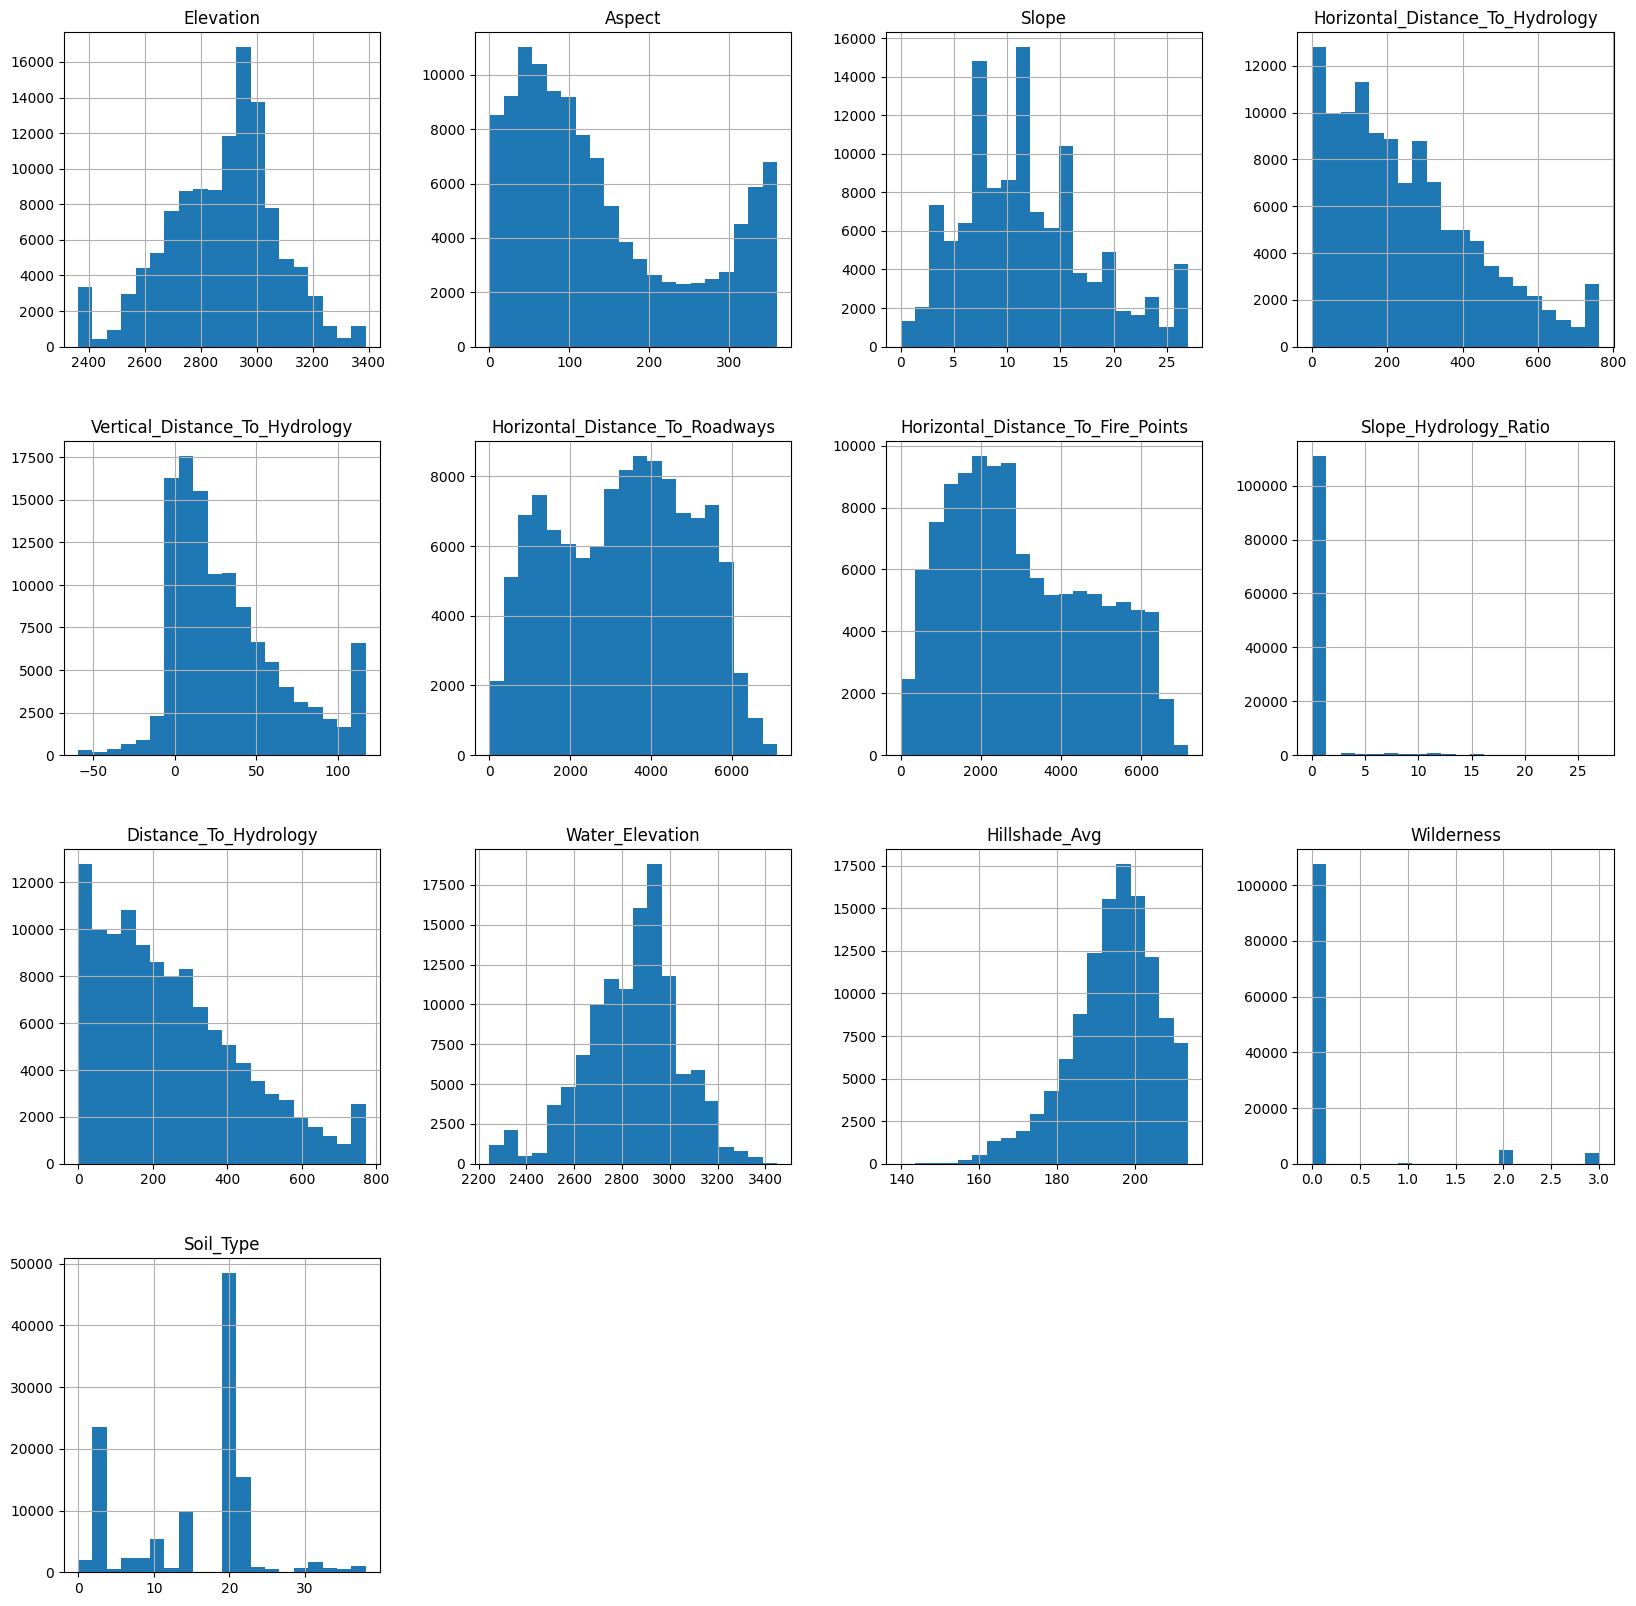

X_test sahpe: (29178, 13)
y_test sahpe: (29178,)
X_train sahpe: (116712, 13)
y_train sahpe: (116712,)


In [30]:
## NUMERIC FEATURE DISTRIBUTIONS

x_train.hist(figsize=(20,20), bins=20)
plt.show()
print("X_test sahpe:",x_test.shape)
print("y_test sahpe:",y_test.shape)
print("X_train sahpe:",x_train.shape)
print("y_train sahpe:",y_train.shape)


In [31]:
print(x_train.head())

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
48006      2995.0   152.0   10.0                             600.0   
12365      2361.5   297.0   27.0                             201.0   
125041     2898.0   103.0    8.0                             175.0   
124283     2949.0   125.0   14.0                             268.0   
70536      2845.0   142.0   16.0                              67.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
48006                             86.0                           5567.0   
12365                            117.0                           1410.0   
125041                            43.0                           2866.0   
124283                            53.0                           3384.0   
70536                             10.0                           2893.0   

        Horizontal_Distance_To_Fire_Points  Slope_Hydrology_Ratio  \
48006                               4056.0               0.

In [32]:
print(x_test.head())

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
60484      3185.0   135.0    1.0                             450.0   
18917      2850.0     4.0   18.0                             134.0   
103094     2622.0   153.0    7.0                             331.0   
101453     2962.0    67.0    8.0                             339.0   
44081      2919.0   300.0    8.0                             162.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
60484                             10.0                           3861.0   
18917                             36.0                           4261.0   
103094                             0.0                            457.0   
101453                             7.0                           4523.0   
44081                             33.0                           6292.0   

        Horizontal_Distance_To_Fire_Points  Slope_Hydrology_Ratio  \
60484                               4294.0               0.

In [33]:
x_test[['Soil_Type','Wilderness']].head()

,Soil_Type,Wilderness
60484,20,0
18917,20,0
103094,3,0
101453,20,0
44081,15,0


SMOTE

In [34]:
### APPLY SMOTE TO BALANCE CLASSES

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", Y.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Cover_Type
4    103071
6     31110
0      3069
3      2160
5      2160
2      2160
1      2160
Name: count, dtype: int64
After SMOTE: Cover_Type
4    82457
5    82457
1    82457
6    82457
3    82457
0    82457
2    82457
Name: count, dtype: int64


FEATURE SELECTION

In [35]:
### GET FEATURE IMPORTANCES FROM TRAINED RANDOMFOREST MODEL 

rf = RandomForestClassifier(n_estimators=100, random_state=42)  
rf.fit(x_train_resampled, y_train_resampled) 

feat_importances = pd.Series(rf.feature_importances_, index=x_train_resampled.columns)
### SELECT all FEATURES BY SORTING IN DESCENDING ORDER 

important_features = feat_importances.sort_values(ascending=False).head(20).index.tolist()

print(f"All features  based on importance:")
print(feat_importances[important_features])

All features  based on importance:
Elevation                             0.182534
Water_Elevation                       0.180301
Horizontal_Distance_To_Roadways       0.113744
Horizontal_Distance_To_Fire_Points    0.104113
Wilderness                            0.095585
Soil_Type                             0.083858
Aspect                                0.051403
Distance_To_Hydrology                 0.039079
Horizontal_Distance_To_Hydrology      0.037398
Slope_Hydrology_Ratio                 0.029520
Hillshade_Avg                         0.028691
Vertical_Distance_To_Hydrology        0.027521
Slope                                 0.026253
dtype: float64


MODEL BUILDING

In [36]:
#Using All Features
X_train_selected=x_train_resampled[important_features]
X_test_selected=x_test[important_features]

In [37]:
#Decion Tree Classifier
dt_model =DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected,y_train_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
y_pred_dt=dt_model.predict(X_test_selected)

print("DecisionTreeClassifier Accuracy:",accuracy_score(y_test,y_pred_dt))
print("\nDecisionTreeClassifier Classification Report:\n",confusion_matrix(y_test,y_pred_dt))
print("\nDecisionTreeClassifier Confusion Matrix:\n",classification_report(y_test,y_pred_dt))

DecisionTreeClassifier Accuracy: 0.9428336417849065

DecisionTreeClassifier Classification Report:
 [[  544     0     7     0    44    11     8]
 [    0   392     8     0     0    32     0]
 [    8    18   322     0     5    78     1]
 [    0     0     0   411     2     0    19]
 [   77     0    15     8 19828     8   678]
 [    4    16    56     0     8   348     0]
 [   24     0     6    40   486     1  5665]]

DecisionTreeClassifier Confusion Matrix:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       614
           1       0.92      0.91      0.91       432
           2       0.78      0.75      0.76       432
           3       0.90      0.95      0.92       432
           4       0.97      0.96      0.97     20614
           5       0.73      0.81      0.76       432
           6       0.89      0.91      0.90      6222

    accuracy                           0.94     29178
   macro avg       0.86      0.88      0.87     29178

In [39]:
#Random Forest ClSSIFIER
rf_model= RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=1,max_depth=20)
rf_model.fit(X_train_selected,y_train_resampled)

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred_rf=rf_model.predict(X_test_selected)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9535266296524779

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       614
           1       0.95      0.93      0.94       432
           2       0.84      0.85      0.84       432
           3       0.92      0.98      0.95       432
           4       0.98      0.96      0.97     20614
           5       0.81      0.86      0.84       432
           6       0.90      0.94      0.92      6222

    accuracy                           0.95     29178
   macro avg       0.89      0.93      0.91     29178
weighted avg       0.96      0.95      0.95     29178


Random Forest Classifier Confusion Matrix:
 [[  583     0     4     0    17     8     2]
 [    0   403     9     0     0    20     0]
 [    6    13   368     0     0    45     0]
 [    2     0     0   425     0     0     5]
 [   97     0    13     4 19832    11   657]
 [    5    10    43     0     1   373   

In [41]:
#K-Nearest Neighbors(KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train_resampled)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
y_pred_knn = knn_model.predict(X_test_selected)

print("KNN Accuracy:", accuracy_score(y_test,y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test,y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.9526012749331688

KNN Confusion Matrix:
 [[  594     0     2     0    10     5     3]
 [    0   404    12     0     0    16     0]
 [    3     9   377     0     8    33     2]
 [    2     0     0   427     0     0     3]
 [  149     0    17    18 19638    18   774]
 [    5    14    48     0     5   360     0]
 [   33     0     1    50   143     0  5995]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       614
           1       0.95      0.94      0.94       432
           2       0.82      0.87      0.85       432
           3       0.86      0.99      0.92       432
           4       0.99      0.95      0.97     20614
           5       0.83      0.83      0.83       432
           6       0.88      0.96      0.92      6222

    accuracy                           0.95     29178
   macro avg       0.87      0.93      0.90     29178
weighted avg       0.96      0.95      0.95     29178



In [43]:
#XGBOOST Classifier
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_selected, y_train_resampled)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [44]:
y_pred_xgb = xgb_model.predict(X_test_selected)

print("XGBoost Accuracy:", accuracy_score(y_test,y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test,y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test,y_pred_xgb))

XGBoost Accuracy: 0.9256631708821715

XGBoost Confusion Matrix:
 [[  592     0     2     0    12     7     1]
 [    0   408     7     0     0    17     0]
 [    5    11   374     0     0    42     0]
 [    1     0     0   427     0     0     4]
 [  122     0    12     6 19598    11   865]
 [    8    10    47     0     0   367     0]
 [   29     0     6    42   900     2  5243]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       614
           1       0.95      0.94      0.95       432
           2       0.83      0.87      0.85       432
           3       0.90      0.99      0.94       432
           4       0.96      0.95      0.95     20614
           5       0.82      0.85      0.84       432
           6       0.86      0.84      0.85      6222

    accuracy                           0.93     29178
   macro avg       0.87      0.92      0.89     29178
weighted avg       0.93      0.93      0.93 

In [45]:
#lOGISTIC Regression
lr_model=make_pipeline(StandardScaler(),LogisticRegression(max_iter=5000,random_state=42))
lr_model.fit(X_train_selected,y_train_resampled)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [46]:
y_pred_lr=lr_model.predict(X_test_selected)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.6395229282336007

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.69      0.19       614
           1       0.80      0.86      0.83       432
           2       0.57      0.62      0.59       432
           3       0.67      0.97      0.79       432
           4       0.87      0.63      0.73     20614
           5       0.58      0.53      0.55       432
           6       0.47      0.64      0.54      6222

    accuracy                           0.64     29178
   macro avg       0.58      0.71      0.60     29178
weighted avg       0.76      0.64      0.68     29178


 Logistic Regression Confusion Matrix:
 [[  423     0    22     0   142    13    14]
 [    0   372    26     0     0    34     0]
 [   13    37   267     0     0   115     0]
 [    4     0     0   419     0     0     9]
 [ 3038     0    19    31 12966     6  4554]
 [   18    56   128     0     0   230     0

In [47]:
## CONVERT MODEL INTO DATAFRAME
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

print(results.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy
1        Random Forest  0.953527
3                  KNN  0.952601
0        Decision Tree  0.942834
4              XGBoost  0.925663
2  Logistic Regression  0.639523


HYPERPARAMETER TUNNING

In [48]:
##Hyperparameter Tuning
### DEFINE SAME MODEL
rf = RandomForestClassifier(random_state=42)
### DEFINE PARAMETER DISTRIBUTION
param_dist = {
    'n_estimators': [100, 200, 300, 500],       
    'max_depth': [10, 20, 30, 50, None],        
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],              
    'max_features': ['sqrt', 'log2'],           
    'bootstrap': [True, False]                  
}
### RANDOMIZED SEARCH 

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,            
    cv=3,                 
    scoring='accuracy',   
    n_jobs=1,            
    verbose=2,
    random_state=42
)
#### FIT MODEL
random_search.fit(X_train_selected, y_train_resampled)
### EVALUATE ON TEST DATA 
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_selected)
print("best parameters:",random_search.best_params_)
print("\n Test Accuracy:", accuracy_score(y_test,y_pred))



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 5.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 4.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 4.8min
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators

In [49]:
### SAVE (DUMP) MODEL

with open('best_model.pkl','wb') as file:
    pickle.dump(best_rf,file)

print("Model Saved Successfully as best_model.pkl")


Model Saved Successfully as best_model.pkl
